# Análisis exploratorio

En esta primera parte del análisis exploratorio se estudian las diferentes columnas que integran el dataset obtenido. En los otros dos notebooks del análisis exploratorio se considera el contenido de los tweets.

In [141]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [142]:
df = pd.read_csv('../data/vacunes_100rt.csv', index_col=0)
df.date = pd.to_datetime(df.date)
df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,coordinates,place,username
0,https://twitter.com/LaBandaPindonga/status/138...,2021-04-30 23:58:58+00:00,"Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...","Anoche dijo Bobeli ""no tenemo' vacuna' po'que ...",1388281755816321026,"{'username': 'LaBandaPindonga', 'displayname':...",[],[],31,400,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,LaBandaPindonga
1,https://twitter.com/HenryChinaski67/status/138...,2021-04-30 23:31:29+00:00,Avanzan las negociaciones para producir íntegr...,Avanzan las negociaciones para producir íntegr...,1388274839417495553,"{'username': 'HenryChinaski67', 'displayname':...",[],[],19,157,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,HenryChinaski67
2,https://twitter.com/ribaniez1/status/138827222...,2021-04-30 23:21:05+00:00,Castro al médico israelí:\nFue efectivo el con...,Castro al médico israelí:\nFue efectivo el con...,1388272223866265602,"{'username': 'ribaniez1', 'displayname': 'Raúl...",[],[],25,248,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,ribaniez1
3,https://twitter.com/EcarleF/status/13882572630...,2021-04-30 22:21:38+00:00,El Laboratorio Richmond en Argentina va a fabr...,El Laboratorio Richmond en Argentina va a fabr...,1388257263085830144,"{'username': 'EcarleF', 'displayname': 'Soy Ed...",[],[],22,293,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,EcarleF
4,https://twitter.com/DrCKambourian/status/13882...,2021-04-30 22:03:41+00:00,Presidente/ Ministra: Dado que ayer estuvieron...,Presidente/ Ministra: Dado que ayer estuvieron...,1388252744176259074,"{'username': 'DrCKambourian', 'displayname': '...",[],[],228,2961,...,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,DrCKambourian


In [143]:
df.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers', 'coordinates',
       'place', 'username'],
      dtype='object')

## Producción de tweets por día

array([<AxesSubplot:title={'center':'date'}>], dtype=object)

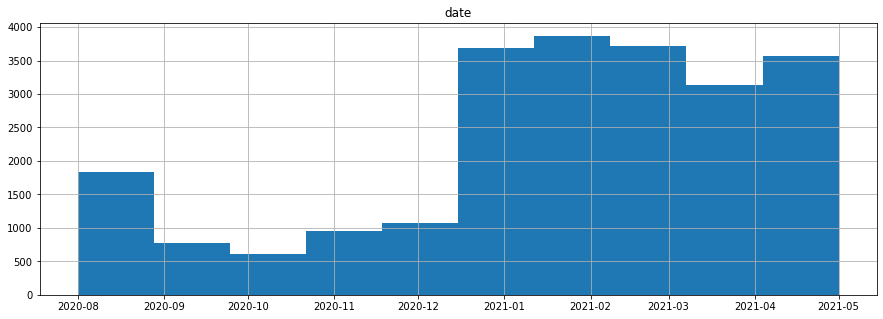

In [144]:
fig, ax = plt.subplots(figsize=(15,5))
df.hist('date', ax=ax)

## Histograma de los contadores

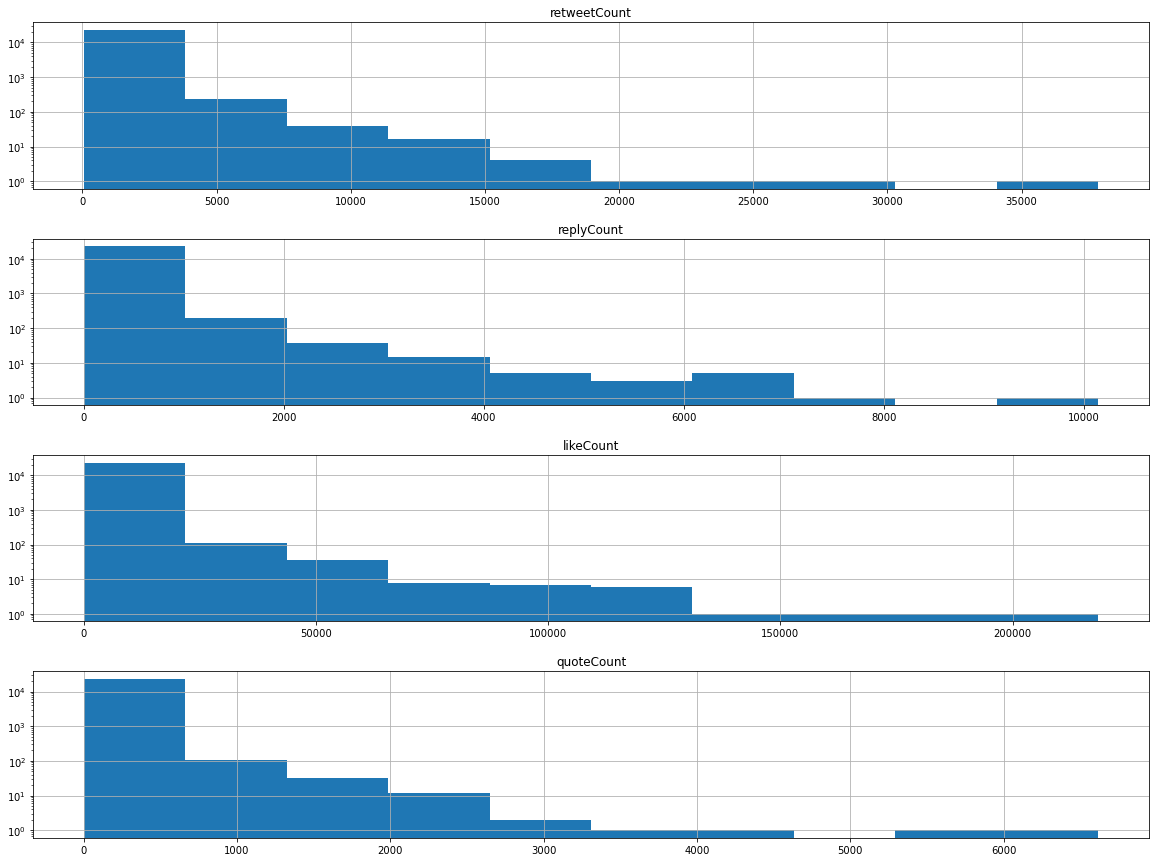

In [145]:
fig, axs = plt.subplots(4, 1, figsize=(20,15))
df.hist('retweetCount', ax=axs[0])
axs[0].set_yscale('log')
df.hist('replyCount', ax=axs[1])
axs[1].set_yscale('log')
df.hist('likeCount', ax=axs[2])
axs[2].set_yscale('log')
df.hist('quoteCount', ax=axs[3])
axs[3].set_yscale('log')

## Usuarios

In [151]:
df.username.unique().shape[0]

7951

In [157]:
df.groupby(by='username').size().sort_values(ascending=False).head(50)

username
Mippcivzla         310
doctormacias       216
el_pais            153
ActualidadRT       141
gorka_orive        139
RTultimahora       137
HLGatell           132
ernestorr          128
AFPespanol         109
jotaalonso          97
SinLinea_Mx         90
CNNEE               84
C5N                 78
askomartin          77
FLMIRONES           70
spitta1969          69
m_ebrard            68
AlertaNews24        67
petrogustavo        66
CancilleriaVE       66
nachomdeo           65
LuisGasulla         64
dw_espanol          62
rochaperiodista     62
MariettoPonce       60
GobiernoMX          60
mianrey             59
Winston_Dunhill     53
StratCons           52
LRsecreta           51
norabar             50
rinconet            50
marcelopuella       49
Claudiashein        49
eldestapeweb        49
Nessnio             47
elmundoes           46
lopezdoriga         46
ferbelaunzaran      44
Cazatalentos        42
ErnesBustamante     41
jgnaredo            41
LillyTellez         40
Fe

In [ ]:
df.username

## Variables con valores no numéricos

Qué porcentaje de estas columnas no es nulo

### media

In [59]:
df[df.media.notna()].shape[0] / df.shape[0] * 1e2

31.797413793103445

In [63]:
df[df.media.notna()][['date', 'content', 'media']].head(5)

,date,content,media
3,2021-04-30 22:21:38+00:00,El Laboratorio Richmond en Argentina va a fabr...,[{'previewUrl': 'https://pbs.twimg.com/media/E...
5,2021-04-30 21:40:08+00:00,"SINCERAMENTE \nVACUNA 1, VIRUS 0\n💉💪😷👇 https:/...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...
6,2021-04-30 21:21:31+00:00,#Noticia 💉 Cómo parte de la población prioriza...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...
7,2021-04-30 21:03:10+00:00,"El ministro de Salud (@MinSaludCol), Fernando ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...
8,2021-04-30 20:36:19+00:00,🇷🇺🛬🇦🇷 Llegó al Aeropuerto de Ezeiza el 13° avi...,[{'previewUrl': 'https://pbs.twimg.com/media/E...


### retweetedTweet

No hay ningún tweet que sea retweet:

In [65]:
df[df.retweetedTweet.notna()].shape[0] / df.shape[0] * 1e2

0.0

### quotedTweet

In [66]:
df[df.quotedTweet.notna()].shape[0] / df.shape[0] * 1e2

5.995689655172414

In [67]:
df[df.quotedTweet.notna()][['date', 'content', "quotedTweet"]]

,date,content,quotedTweet
46,2021-04-30 12:06:06+00:00,No me jodas.\nQue la EMA ha dicho claramente q...,{'url': 'https://twitter.com/eldiarioes/status...
62,2021-04-30 01:21:12+00:00,La vacuna Covishield va a dejar de exportarse ...,{'url': 'https://twitter.com/GiSogne/status/13...
67,2021-04-30 00:15:08+00:00,Un diputado paraguayo utiliza recursos RACISTA...,{'url': 'https://twitter.com/HugoRamirezANR/st...
70,2021-04-29 23:56:23+00:00,🇷🇺✌️🇲🇽 El nuevo cargamento - esta vez 8⃣0⃣0⃣ m...,{'url': 'https://twitter.com/sputnikvaccine/st...
85,2021-04-29 21:10:28+00:00,Luego de escándalo internacional por acoso lab...,{'url': 'https://twitter.com/EddyMartin1976/st...
...,...,...,...
23147,2020-08-02 17:05:29+00:00,Genial: #ElMequetrefe le ordenó a Fachito Sant...,{'url': 'https://twitter.com/HELIODOPTERO/stat...
23150,2020-08-02 14:59:41+00:00,Que miedo que sea verdad que la vacuna saldrá ...,{'url': 'https://twitter.com/IriMin05/status/1...
23151,2020-08-02 14:29:34+00:00,Aquí nos describen como se esta desarrollando ...,{'url': 'https://twitter.com/elespectador/stat...
23155,2020-08-02 12:34:06+00:00,#AtenciónYSaludParaTodos Rusia culminó las pru...,{'url': 'https://twitter.com/ConElMazoDando/st...


## mentionedUsers

In [68]:
df[df.mentionedUsers.notna()].shape[0] / df.shape[0] * 1e2

16.987068965517242

In [69]:
df[df.mentionedUsers.notna()].head(5)[['date', 'content', 'mentionedUsers']]

,date,content,mentionedUsers
6,2021-04-30 21:21:31+00:00,#Noticia 💉 Cómo parte de la población prioriza...,"[{'username': 'Fruizgomez', 'displayname': 'Fe..."
7,2021-04-30 21:03:10+00:00,"El ministro de Salud (@MinSaludCol), Fernando ...","[{'username': 'MinSaludCol', 'displayname': 'M..."
8,2021-04-30 20:36:19+00:00,🇷🇺🛬🇦🇷 Llegó al Aeropuerto de Ezeiza el 13° avi...,"[{'username': 'Aerolineas_AR', 'displayname': ..."
27,2021-04-30 17:24:50+00:00,"""La cultura es una vacuna frente al odio, es e...","[{'username': 'isaserras', 'displayname': 'Isa..."
39,2021-04-30 13:02:12+00:00,#BeatoDelPueblo @rafael_1981_198😷🇻🇪 nuestra me...,"[{'username': 'rafael_1981_198', 'displayname'..."


## coordinates

In [70]:
df[df.coordinates.notna()].shape[0] / df.shape[0] * 1e2

2.0172413793103448

## place

In [71]:
df[df.place.notna()].shape[0] / df.shape[0] * 1e2

2.0172413793103448

_coordinates_ y _place_ van a la par:

In [72]:
df[df.place.notna() & df.coordinates.notna()].shape[0] / df.shape[0] * 1e2

2.0172413793103448

### outlinks

In [74]:
df.outlinks.head()

0    []
1    []
2    []
3    []
4    []
Name: outlinks, dtype: object

In [85]:
df[df.outlinks != '[]'][['date', 'content', 'outlinks']]

,date,content,outlinks
6,2021-04-30 21:21:31+00:00,#Noticia 💉 Cómo parte de la población prioriza...,['https://bit.ly/3u9DZSm']
8,2021-04-30 20:36:19+00:00,🇷🇺🛬🇦🇷 Llegó al Aeropuerto de Ezeiza el 13° avi...,['https://bit.ly/3xEeavB']
12,2021-04-30 20:00:53+00:00,EN VIVO | Coronavirus COVID 19 - Llegada desde...,['https://twitter.com/i/broadcasts/1dRKZNOLyZr...
15,2021-04-30 19:36:39+00:00,Avanza acuerdo para fabricar la vacuna de Sino...,['http://bit.ly/3xvNVYi']
24,2021-04-30 17:44:54+00:00,ÚLTIMA HORA\nRusia: La vacuna Sputink V garant...,['https://es.rt.com/8do2']
...,...,...,...
23187,2020-08-01 15:27:41+00:00,Rusia ya terminó pruebas clínicas de primera v...,['https://www.laiguana.tv/articulos/775169-rus...
23188,2020-08-01 14:58:37+00:00,Este es el estudio que mostró que la vacuna de...,['https://www.nejm.org/doi/full/10.1056/NEJMoa...
23193,2020-08-01 13:12:25+00:00,"En esta nota de @diariocorreo, @Erick_Rivera96...",['https://twitter.com/diariocorreo/status/1289...
23194,2020-08-01 10:00:06+00:00,El ministro ruso de Sanidad ha anunciado que l...,['https://bit.ly/39LRZIm']


In [86]:
df[df.outlinks != '[]'][['date', 'content', 'outlinks']].shape[0] / df.shape[0] * 1e2

23.530172413793103

### tocooutlinks

In [88]:
df[df.tcooutlinks != '[]'][['date', 'content', 'outlinks']]

,date,content,outlinks
6,2021-04-30 21:21:31+00:00,#Noticia 💉 Cómo parte de la población prioriza...,['https://bit.ly/3u9DZSm']
8,2021-04-30 20:36:19+00:00,🇷🇺🛬🇦🇷 Llegó al Aeropuerto de Ezeiza el 13° avi...,['https://bit.ly/3xEeavB']
12,2021-04-30 20:00:53+00:00,EN VIVO | Coronavirus COVID 19 - Llegada desde...,['https://twitter.com/i/broadcasts/1dRKZNOLyZr...
15,2021-04-30 19:36:39+00:00,Avanza acuerdo para fabricar la vacuna de Sino...,['http://bit.ly/3xvNVYi']
24,2021-04-30 17:44:54+00:00,ÚLTIMA HORA\nRusia: La vacuna Sputink V garant...,['https://es.rt.com/8do2']
...,...,...,...
23187,2020-08-01 15:27:41+00:00,Rusia ya terminó pruebas clínicas de primera v...,['https://www.laiguana.tv/articulos/775169-rus...
23188,2020-08-01 14:58:37+00:00,Este es el estudio que mostró que la vacuna de...,['https://www.nejm.org/doi/full/10.1056/NEJMoa...
23193,2020-08-01 13:12:25+00:00,"En esta nota de @diariocorreo, @Erick_Rivera96...",['https://twitter.com/diariocorreo/status/1289...
23194,2020-08-01 10:00:06+00:00,El ministro ruso de Sanidad ha anunciado que l...,['https://bit.ly/39LRZIm']


In [98]:
df[df.tcooutlinks != '[]'][['date', 'content', 'tcooutlinks']].shape[0] / df.shape[0] * 1e2

23.530172413793103

_outlinks_ y _tocooutlinks_ vuelven a ir juntos:

In [99]:
df[ (df.tcooutlinks != '[]') & (df.outlinks != '[]') ][['date', 'content', 'tcooutlinks']].shape[0] / df.shape[0] * 1e2

23.530172413793103

Siempre son diferentes cuando no son '\[\]'

In [102]:
df[(df.tcooutlinks == df.outlinks) ][['date', 'content', 'tcooutlinks']].shape[0] / df.shape[0] * 1e2

76.46982758620689

In [103]:
df[(df.tcooutlinks == df.outlinks) & (df.outlinks != '[]') ][['date', 'content', 'outlinks', 'tcooutlinks']]

,date,content,outlinks,tcooutlinks


## Agrupaciones

In [107]:
df.sourceLabel.value_counts()

Twitter for iPhone      7217
Twitter for Android     6815
Twitter Web App         6197
TweetDeck               1411
Twitter Media Studio     421
                        ... 
Agorapulse app             1
pulzocol                   1
GRFeed                     1
Metricool                  1
RT News Sharing            1
Name: sourceLabel, Length: 61, dtype: int64

Casi todo son conversaciones diferentes:

In [110]:
print(df.conversationId.value_counts().shape[0] / df.shape[0] * 1e2, '\n')
df.conversationId.value_counts()

98.9094827586207 



1340826495326031872    9
1354152577009639425    9
1378558945342676992    8
1374920990443110417    6
1340990294754553856    6
                      ..
1357155065199554562    1
1298307217377185792    1
1354430599742763009    1
1369311170981748741    1
1380599570929946624    1
Name: conversationId, Length: 22947, dtype: int64

In [116]:
df.id.unique().shape[0] / df.id.shape[0]

1.0

In [128]:
df.lang.value_counts()

es     22799
ca       338
ro        15
und       15
en        13
it         8
pt         6
cs         2
fr         1
uk         1
et         1
tl         1
Name: lang, dtype: int64

Muchos están mal etiquetados:

In [129]:
foreign = df.lang.value_counts().index.tolist()
foreign = [lang for lang in foreign if lang not in ['es', 'ca']]
df[df.lang.isin(foreign)][['date', 'content']].head(20)

,date,content
89,2021-04-29 20:09:21+00:00,VACUNA O MUERTE! #GetVaccinated #COVID19 is no...
511,2021-04-24 19:58:35+00:00,Vacuna matata https://t.co/aXnKXNRgJn
694,2021-04-22 10:58:15+00:00,Mi padre post-vacuna https://t.co/1YVIf0fCon
695,2021-04-22 09:40:42+00:00,"Periodista, di vacuna... https://t.co/hhRsV7Gf4R"
1611,2021-04-14 12:41:02+00:00,Informe del @msalnacion sobre porcentaje de ...
2733,2021-04-08 14:11:48+00:00,Solicita la vacuna Sputnik hoy y te regalamos ...
4042,2021-03-31 14:36:18+00:00,Descarga de dosis de vacuna de Pfizer. https:/...
4058,2021-03-31 12:40:30+00:00,👏 Arriba a @AICM_mx un avión ✈️ procedente de ...
4161,2021-03-30 15:46:54+00:00,Lupito Ferrer se vacuna https://t.co/hpb4jisFu3
4936,2021-03-23 16:51:10+00:00,GREAT news: @TexasDSHS has announced that ALL ...


In [136]:
df[df.content != df.renderedContent][['content', 'renderedContent']].iloc[0].content

'#Noticia 💉 Cómo parte de la población priorizada en la etapa 2 del Plan Nacional de Vacunación, el ministro @Fruizgomez recibió hoy la vacuna contra la COVID-19. \n\nℹ️ https://t.co/0gZ7jhWAtN https://t.co/77VtyEPznb'

In [137]:
df[df.content != df.renderedContent][['content', 'renderedContent']].iloc[0].renderedContent

'#Noticia 💉 Cómo parte de la población priorizada en la etapa 2 del Plan Nacional de Vacunación, el ministro @Fruizgomez recibió hoy la vacuna contra la COVID-19. \n\nℹ️ bit.ly/3u9DZSm https://t.co/77VtyEPznb'

In [140]:
df.url.unique().shape[0] / df.shape[0]

1.0

In [80]:
df.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers', 'coordinates',
       'place', 'username'],
      dtype='object')